In [7]:
import pandas as pd
import numpy as np

In [8]:
encoded_df = pd.read_csv("merged_dataset.csv")

In [9]:

from sklearn.preprocessing import LabelEncoder

# Load the dataset
encoded_df = pd.read_csv(r"C:\Users\pavit\Desktop\CNC_MILLING\merged_dataset.csv")  # Update with correct path


# Label Encoding for binary columns
le = LabelEncoder()
encoded_df["tool_condition"] = le.fit_transform(encoded_df["tool_condition"])
encoded_df["machining_finalized"] = le.fit_transform(encoded_df["machining_finalized"])
encoded_df["Machining_Process"] = le.fit_transform(encoded_df["Machining_Process"])




In [10]:
encoded_df.dtypes

X1_ActualPosition            float64
X1_ActualVelocity            float64
X1_ActualAcceleration        float64
X1_CommandPosition           float64
X1_CommandVelocity           float64
X1_CommandAcceleration       float64
X1_CurrentFeedback           float64
X1_DCBusVoltage              float64
X1_OutputCurrent             float64
X1_OutputVoltage             float64
X1_OutputPower               float64
Y1_ActualPosition            float64
Y1_ActualVelocity            float64
Y1_ActualAcceleration        float64
Y1_CommandPosition           float64
Y1_CommandVelocity           float64
Y1_CommandAcceleration       float64
Y1_CurrentFeedback           float64
Y1_DCBusVoltage              float64
Y1_OutputCurrent             float64
Y1_OutputVoltage             float64
Y1_OutputPower               float64
Z1_ActualPosition            float64
Z1_ActualVelocity            float64
Z1_ActualAcceleration        float64
Z1_CommandPosition           float64
Z1_CommandVelocity           float64
Z

In [11]:
stat_features = encoded_df.describe().T[['mean', 'std', 'min', 'max']]



In [12]:
# Assuming your DataFrame 
encoded_df['time'] = pd.to_timedelta(encoded_df.index * 100, unit='ms')  # 100 ms per row
encoded_df.set_index('time', inplace=True)


In [14]:
sensor_cols = encoded_df.columns[:45]  # or whatever range you want
 
window = 10

for col in sensor_cols:
    encoded_df[f'{col}_roll_mean'] = encoded_df[col].rolling(window).mean()
    encoded_df[f'{col}_roll_std'] = encoded_df[col].rolling(window).std()


In [15]:
encoded_df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_CURRENT_PROGRAM_NUMBER_roll_mean,M1_CURRENT_PROGRAM_NUMBER_roll_std,M1_sequence_number_roll_mean,M1_sequence_number_roll_std,M1_CURRENT_FEEDRATE_roll_mean,M1_CURRENT_FEEDRATE_roll_std,Machining_Process_roll_mean,Machining_Process_roll_std,No_roll_mean,No_roll_std
time,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.100000,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.200000,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.300000,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.400000,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:41:35,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,...,1.0,0.0,53.1,18.064391,3.0,0.0,0.0,0.0,18.0,0.0
0 days 00:41:35.100000,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,...,1.0,0.0,52.7,17.913682,3.0,0.0,0.0,0.0,18.0,0.0
0 days 00:41:35.200000,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,...,1.0,0.0,52.3,17.751682,3.0,0.0,0.0,0.0,18.0,0.0


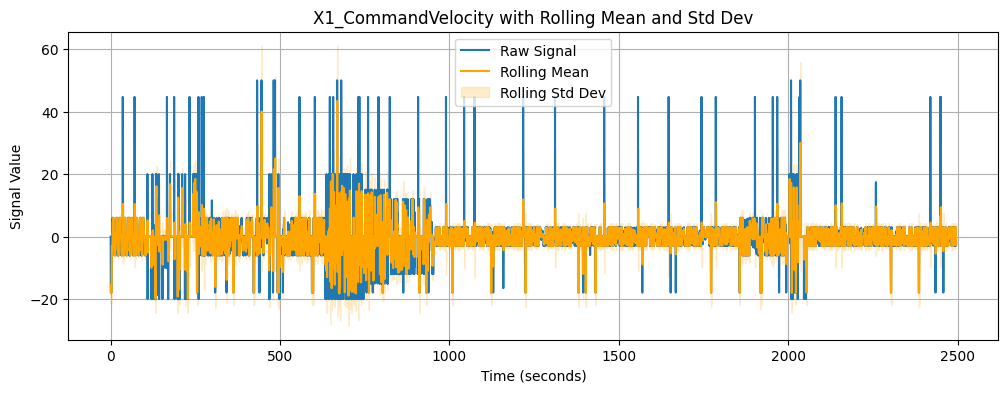

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

encoded_df = encoded_df.copy()
encoded_df['time_seconds'] = encoded_df.index.total_seconds()


col = "X1_CommandVelocity"

plt.figure(figsize=(12, 4))
plt.plot(encoded_df['time_seconds'], encoded_df[col], label='Raw Signal')
plt.plot(encoded_df['time_seconds'], encoded_df[f'{col}_roll_mean'], label='Rolling Mean', color='orange')
plt.fill_between(encoded_df['time_seconds'],
                 encoded_df[f'{col}_roll_mean'] - encoded_df[f'{col}_roll_std'],
                 encoded_df[f'{col}_roll_mean'] + encoded_df[f'{col}_roll_std'],
                 color='orange', alpha=0.2, label='Rolling Std Dev')

plt.legend()
plt.grid(True)
plt.title(f"{col} with Rolling Mean and Std Dev")
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Value")
plt.show()



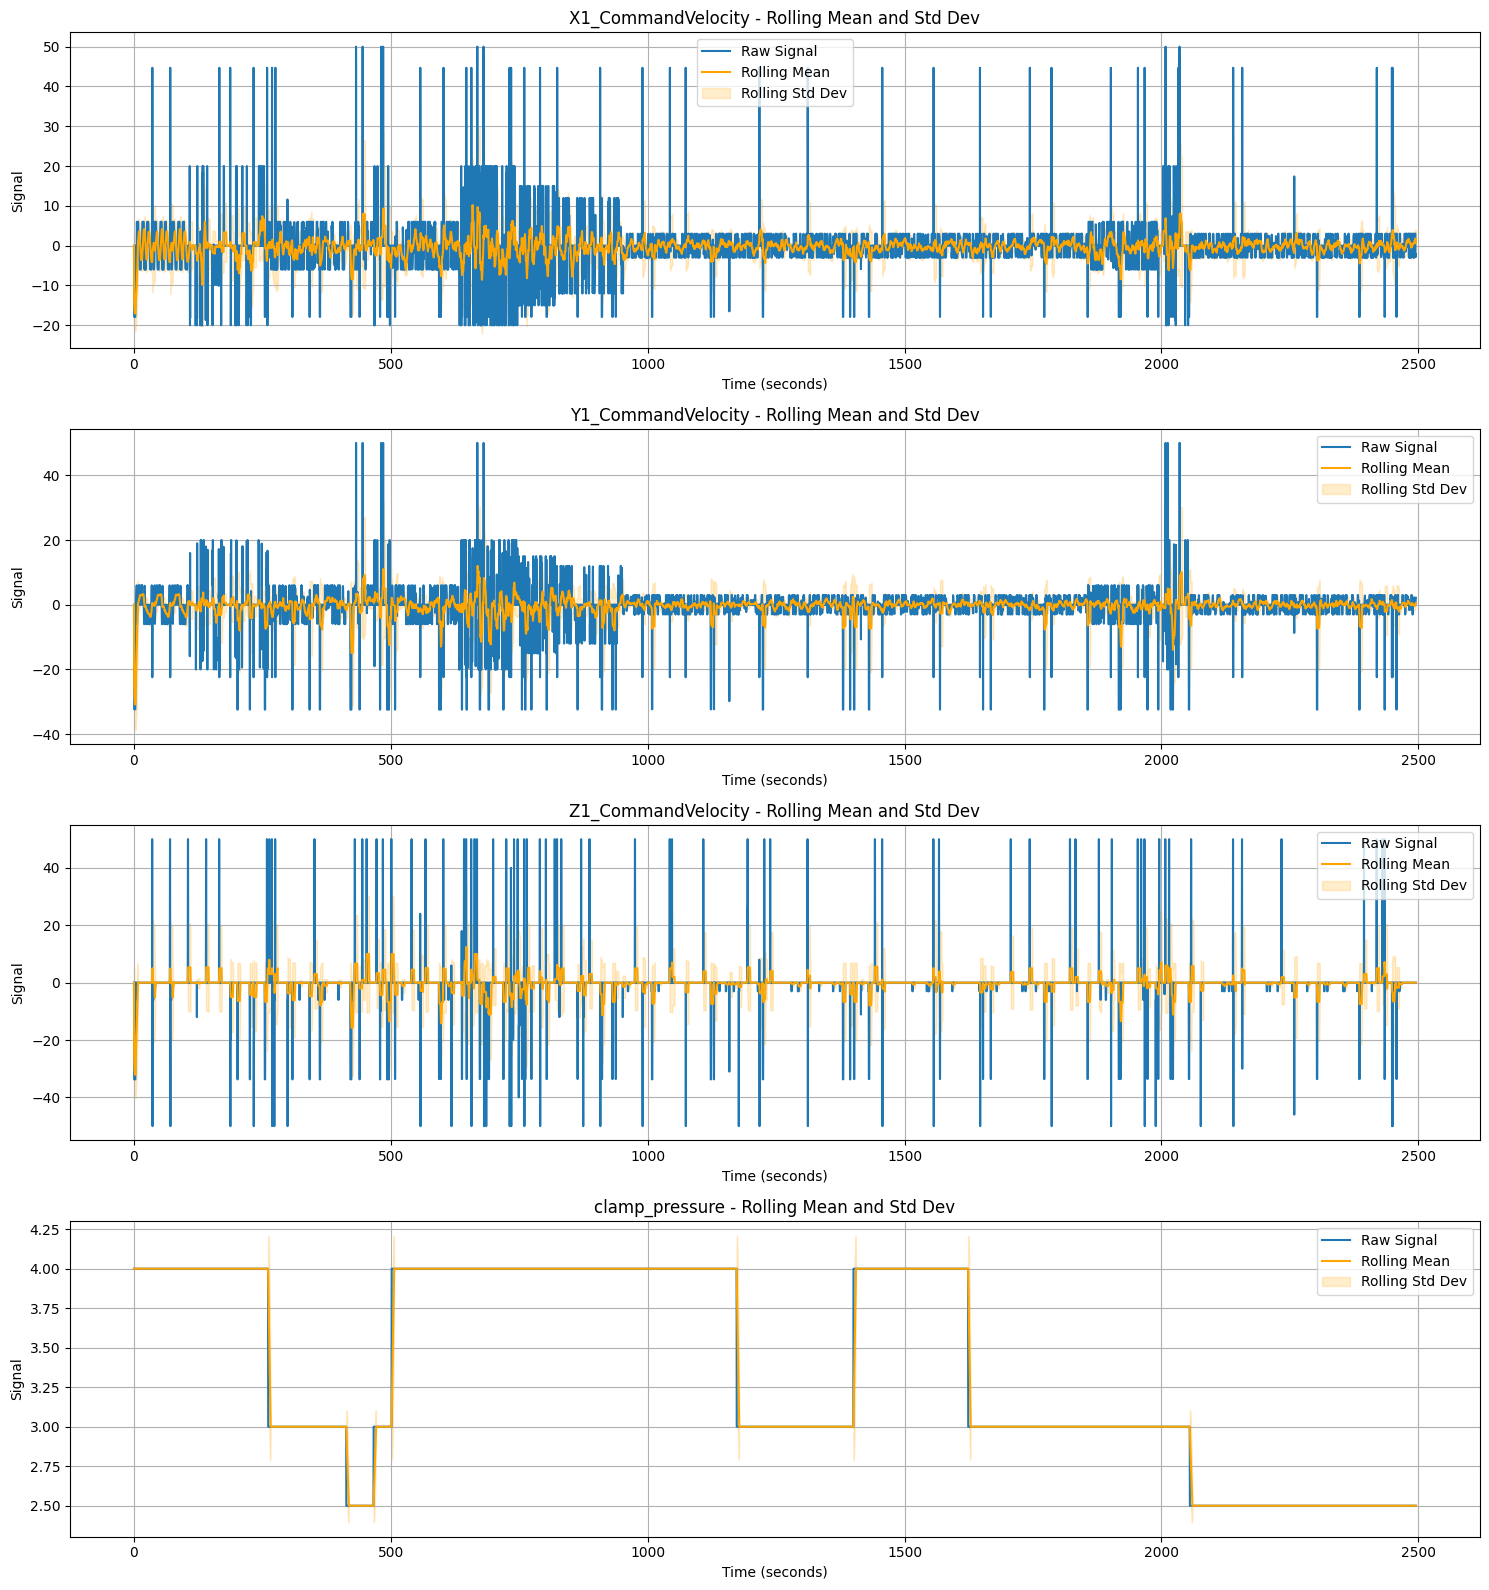

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Copy to avoid changing original data
df = encoded_df.copy()

# Ensure proper time-based index column
if isinstance(df.index, pd.TimedeltaIndex):
    df['time_seconds'] = df.index.total_seconds()
elif isinstance(df.index, pd.DatetimeIndex):
    df['time_seconds'] = (df.index - df.index[0]).total_seconds()
else:
    df['time_seconds'] = df.index  # fallback if index isn't time-based

# ✅ Columns you want to visualize
selected_columns = [
    "X1_CommandVelocity",
    "Y1_CommandVelocity",
    "Z1_CommandVelocity",
    "clamp_pressure"
]

# Rolling settings
window_size = 50

# 📈 Plot each column in a subplot
num_cols = len(selected_columns)
plt.figure(figsize=(15, 4 * num_cols))

for i, col in enumerate(selected_columns, 1):
    df[f'{col}_roll_mean'] = df[col].rolling(window=window_size, min_periods=1).mean()
    df[f'{col}_roll_std'] = df[col].rolling(window=window_size, min_periods=1).std()
    
    plt.subplot(num_cols, 1, i)
    plt.plot(df['time_seconds'], df[col], label='Raw Signal')
    plt.plot(df['time_seconds'], df[f'{col}_roll_mean'], label='Rolling Mean', color='orange')
    plt.fill_between(df['time_seconds'],
                     df[f'{col}_roll_mean'] - df[f'{col}_roll_std'],
                     df[f'{col}_roll_mean'] + df[f'{col}_roll_std'],
                     color='orange', alpha=0.2, label='Rolling Std Dev')
    
    plt.title(f"{col} - Rolling Mean and Std Dev")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Signal")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [19]:
encoded_df.columns

Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage',
       ...
       'M1_CURRENT_PROGRAM_NUMBER_roll_std', 'M1_sequence_number_roll_mean',
       'M1_sequence_number_roll_std', 'M1_CURRENT_FEEDRATE_roll_mean',
       'M1_CURRENT_FEEDRATE_roll_std', 'Machining_Process_roll_mean',
       'Machining_Process_roll_std', 'No_roll_mean', 'No_roll_std',
       'time_seconds'],
      dtype='object', length=141)